In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline

In [3]:
stars_df = pd.read_csv('Stars.csv')

In [4]:
stars_df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


Temperature -- K \
L -- L/Lo \
R -- R/Ro \
AM -- Mv \
Color -- General Color of Spectrum \
Spectral_Class -- O,B,A,F,G,K,M / SMASS - https://en.wikipedia.org/wiki/Asteroid_spectral_types \
Type -- Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , Super Giants, Hyper Giants 

Type:
* Red Dwarf - 0
* Brown Dwarf - 1
* White Dwarf - 2
* Main Sequence - 3
* Super Giants - 4
* Hyper Giants - 5

In [5]:
sample_df = pd.DataFrame()
for i in range(5+1):
    sample_df = sample_df.append(stars_df[stars_df['Type']==i].sample(5))
sample_df

,Temperature,L,R,A_M,Color,Spectral_Class,Type
6,2637,0.000730,0.12700,17.220,Red,M,0
188,2778,0.000849,0.11200,19.450,Red,M,0
1,3042,0.000500,0.15420,16.600,Red,M,0
62,2983,0.000240,0.09400,16.090,Red,M,0
9,2700,0.000180,0.13000,16.050,Red,M,0
74,3550,0.004000,0.29100,10.890,Red,M,1
14,2650,0.000600,0.14000,11.782,Red,M,1
19,3441,0.039000,0.35100,11.180,Red,M,1
138,3324,0.003400,0.34000,12.230,Red,M,1
15,3340,0.003800,0.24000,13.070,Red,M,1


<AxesSubplot:>

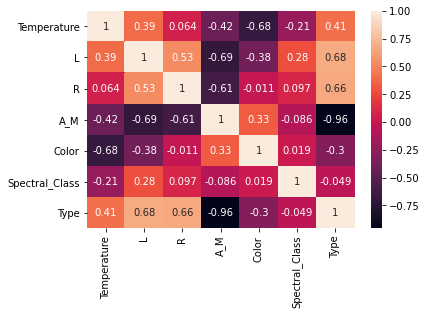

In [429]:
sns.heatmap(stars_df.corr(),annot=True)

In [25]:
sample_df.Type.nunique()

6

In [547]:
lb = OrdinalEncoder()
test = lb.fit_transform(stars_df[['Color']])

In [427]:
stars_df['Color']=pd.DataFrame(test.astype(int))
stars_df

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,8,M,0
1,3042,0.000500,0.1542,16.60,8,M,0
2,2600,0.000300,0.1020,18.70,8,M,0
3,2800,0.000200,0.1600,16.65,8,M,0
4,1939,0.000138,0.1030,20.06,8,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,0,O,5
236,30839,834042.000000,1194.0000,-10.63,0,O,5
237,8829,537493.000000,1423.0000,-10.73,9,A,5
238,9235,404940.000000,1112.0000,-11.23,9,A,5


In [428]:
test = lb.fit_transform(stars_df[['Spectral_Class']])
stars_df['Spectral_Class']=pd.DataFrame(test.astype(int))
stars_df

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,8,5,0
1,3042,0.000500,0.1542,16.60,8,5,0
2,2600,0.000300,0.1020,18.70,8,5,0
3,2800,0.000200,0.1600,16.65,8,5,0
4,1939,0.000138,0.1030,20.06,8,5,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,0,6,5
236,30839,834042.000000,1194.0000,-10.63,0,6,5
237,8829,537493.000000,1423.0000,-10.73,9,0,5
238,9235,404940.000000,1112.0000,-11.23,9,0,5


In [430]:
scaler = StandardScaler()
stars_df_scaled = scaler.fit_transform(stars_df.drop(['Type'],axis=1))

In [431]:
stars_df_scaled

array([[-0.7793821 , -0.59862356, -0.45920992,  1.11674535,  0.5317879 ,
         0.59533835],
       [-0.78210961, -0.59862357, -0.45924053,  1.16241376,  0.5317879 ,
         0.59533835],
       [-0.82847728, -0.59862357, -0.45934168,  1.36221308,  0.5317879 ,
         0.59533835],
       ...,
       [-0.17502879,  2.40315735,  2.29779992, -1.43783157,  0.76990189,
        -1.80199729],
       [-0.13243767,  1.66287782,  1.69517694, -1.48540283,  0.76990189,
        -1.80199729],
       [ 2.87275403,  1.04834522,  2.99536993, -1.15906395, -1.37312399,
         1.07480548]])

[0.08246945 0.10058833 0.27490337 0.3227315  0.08622616 0.13308119]


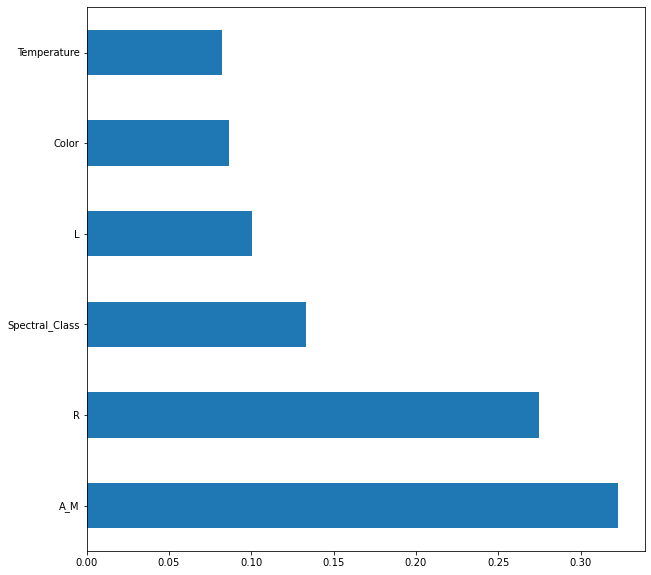

In [433]:
X = stars_df.drop(['Type'], axis=1)
y = stars_df['Type']
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

plt.figure(figsize=(10,10))
feat_importances.nlargest(29).plot(kind='barh')
plt.show()

In [102]:
X.iloc[:,:4]

,Temperature,L,R,A_M
0,3068,0.002400,0.1700,16.12
1,3042,0.000500,0.1542,16.60
2,2600,0.000300,0.1020,18.70
3,2800,0.000200,0.1600,16.65
4,1939,0.000138,0.1030,20.06
...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93
236,30839,834042.000000,1194.0000,-10.63
237,8829,537493.000000,1423.0000,-10.73
238,9235,404940.000000,1112.0000,-11.23


In [440]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xs = scaler.fit_transform(X.iloc[:,:4])
Xs = pd.DataFrame(Xs)
Xf = Xs.merge(X.iloc[:,4:],how='left', on=Xs.index)
Xf = Xf.drop(columns=['key_0'])
Xf

,0,1,2,3,Color,Spectral_Class
0,-0.779382,-0.598624,-0.459210,1.116745,8,5
1,-0.782110,-0.598624,-0.459241,1.162414,8,5
2,-0.828477,-0.598624,-0.459342,1.362213,8,5
3,-0.807496,-0.598624,-0.459229,1.167171,8,5
4,-0.897819,-0.598624,-0.459340,1.491607,8,5
...,...,...,...,...,...,...
235,2.983743,1.494720,2.167974,-1.361718,0,6
236,2.133913,4.059319,1.854068,-1.428317,0,6
237,-0.175029,2.403157,2.297800,-1.437832,9,0
238,-0.132438,1.662878,1.695177,-1.485403,9,0


In [472]:
X_train, X_test, y_train, y_test = train_test_split(Xf,y, test_size=0.2, random_state=42)

In [543]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=50, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=20, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=6, activation='softmax')
])
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [544]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [545]:
history = model.fit(X_train, y_train,epochs=200, batch_size=32, validation_split=0.2, callbacks=early_stopping_cb)

Epoch 1/200
5/5 [==============================] - 0s 30ms/step - loss: 1.8515 - accuracy: 0.1961 - val_loss: 1.7279 - val_accuracy: 0.2308
Epoch 2/200
5/5 [==============================] - 0s 5ms/step - loss: 1.8098 - accuracy: 0.2157 - val_loss: 1.6952 - val_accuracy: 0.4872
Epoch 3/200
5/5 [==============================] - 0s 5ms/step - loss: 1.7672 - accuracy: 0.2680 - val_loss: 1.6545 - val_accuracy: 0.4872
Epoch 4/200
5/5 [==============================] - 0s 5ms/step - loss: 1.6750 - accuracy: 0.3529 - val_loss: 1.6124 - val_accuracy: 0.4615
Epoch 5/200
5/5 [==============================] - 0s 5ms/step - loss: 1.6463 - accuracy: 0.3007 - val_loss: 1.5565 - val_accuracy: 0.4872
Epoch 6/200
5/5 [==============================] - 0s 5ms/step - loss: 1.6287 - accuracy: 0.3529 - val_loss: 1.4915 - val_accuracy: 0.5641
Epoch 7/200
5/5 [==============================] - 0s 5ms/step - loss: 1.5245 - accuracy: 0.4444 - val_loss: 1.4351 - val_accuracy: 0.6667
Epoch 8/200
5/5 [=========

5/5 [==============================] - 0s 5ms/step - loss: 0.3728 - accuracy: 0.8431 - val_loss: 0.1618 - val_accuracy: 0.9744
Epoch 60/200
5/5 [==============================] - 0s 5ms/step - loss: 0.3388 - accuracy: 0.8235 - val_loss: 0.1471 - val_accuracy: 0.9744
Epoch 61/200
5/5 [==============================] - 0s 5ms/step - loss: 0.3474 - accuracy: 0.8758 - val_loss: 0.1282 - val_accuracy: 0.9744
Epoch 62/200
5/5 [==============================] - 0s 5ms/step - loss: 0.3774 - accuracy: 0.8366 - val_loss: 0.1256 - val_accuracy: 0.9744
Epoch 63/200
5/5 [==============================] - 0s 4ms/step - loss: 0.3273 - accuracy: 0.8824 - val_loss: 0.1304 - val_accuracy: 0.9744
Epoch 64/200
5/5 [==============================] - 0s 5ms/step - loss: 0.3978 - accuracy: 0.8105 - val_loss: 0.1147 - val_accuracy: 1.0000
Epoch 65/200
5/5 [==============================] - 0s 4ms/step - loss: 0.3126 - accuracy: 0.8824 - val_loss: 0.1022 - val_accuracy: 1.0000
Epoch 66/200
5/5 [===============

5/5 [==============================] - 0s 5ms/step - loss: 0.1316 - accuracy: 0.9608 - val_loss: 0.0137 - val_accuracy: 1.0000
Epoch 118/200
5/5 [==============================] - 0s 4ms/step - loss: 0.1334 - accuracy: 0.9412 - val_loss: 0.0158 - val_accuracy: 1.0000
Epoch 119/200
5/5 [==============================] - 0s 4ms/step - loss: 0.1624 - accuracy: 0.9346 - val_loss: 0.0122 - val_accuracy: 1.0000
Epoch 120/200
5/5 [==============================] - 0s 5ms/step - loss: 0.1278 - accuracy: 0.9346 - val_loss: 0.0152 - val_accuracy: 1.0000
Epoch 121/200
5/5 [==============================] - 0s 5ms/step - loss: 0.1077 - accuracy: 0.9608 - val_loss: 0.0252 - val_accuracy: 1.0000
Epoch 122/200
5/5 [==============================] - ETA: 0s - loss: 0.0462 - accuracy: 1.00 - 0s 5ms/step - loss: 0.1420 - accuracy: 0.9412 - val_loss: 0.0182 - val_accuracy: 1.0000
Epoch 123/200
5/5 [==============================] - 0s 5ms/step - loss: 0.1184 - accuracy: 0.9673 - val_loss: 0.0128 - val_ac

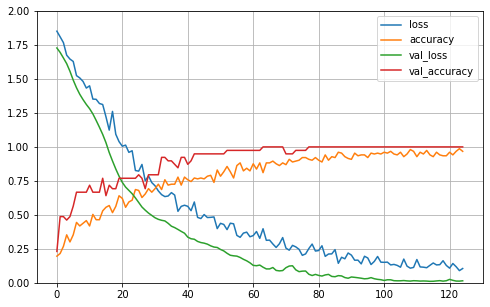

In [536]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

In [546]:
print(model.evaluate(X_train,y_train))
print(model.evaluate(X_test,y_test))

6/6 [==============================] - 0s 1ms/step - loss: 0.0317 - accuracy: 0.9948
[0.03170469403266907, 0.9947916865348816]
2/2 [==============================] - 0s 2ms/step - loss: 0.1142 - accuracy: 0.9792
[0.1141921803355217, 0.9791666865348816]


In [516]:
from sklearn.ensemble import RandomForestClassifier

In [517]:
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [518]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score,f1_score

In [519]:
y_pred = rnd_clf.predict(X_test)

In [520]:
confusion_matrix(y_pred, y_test)

array([[ 8,  0,  0,  0,  0,  0],
       [ 0,  7,  0,  0,  0,  0],
       [ 0,  0,  6,  0,  0,  0],
       [ 0,  0,  0,  8,  0,  0],
       [ 0,  0,  0,  0,  8,  0],
       [ 0,  0,  0,  0,  0, 11]], dtype=int64)

In [522]:
print(accuracy_score(rnd_clf.predict(X_train),y_train))
print(accuracy_score(y_pred,y_test))

1.0
1.0
